## Multiple Linear Regression

Linear regression is useful when we want to predict the values of a variable from its relationship with other variables. There are two different types of linear regression models (simple linear regression and multiple linear regression).

In predicting the price of a home, one factor to consider is the size of the home. The relationship between those two variables, price and size, is important, but there are other variables that factor in to pricing a home: location, air quality, demographics, parking, and more. When making predictions for price, our dependent variable, we’ll want to use multiple independent variables. To do this, we’ll use Multiple Linear Regression.

Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable. It is based on the following equation that we’ll explore later on: 
$$\\y = b+m_{1}x_{1}+m_{2}x_{2}+...+m_{n}x_{n}

StreetEasy Dataset

You’ll learn multiple linear regression by performing it on this dataset. It contains information about apartments in New York.

In this example, we used size (ft²) and building age (years) as independent variables to predict the rent ($).

When we have two independent variables, we can create a linear regression plane. We can now guess what the rent is by plugging in the independent variables and finding where they lie on the plane.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

streeteasy = pd.read_csv("manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['size_sqft','building_age_yrs']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

ols = LinearRegression()

ols.fit(x_train, y_train)

# Plot the figure
fig = plt.figure(1, figsize=(6, 4))
plt.clf()

elev = 43.5
azim = -110

ax = Axes3D(fig, elev=elev, azim=azim)

ax.scatter(x_train[['size_sqft']], x_train[['building_age_yrs']], y_train, c='k', marker='+')

ax.plot_surface(np.array([[0, 0], [4500, 4500]]), np.array([[0, 140], [0, 140]]), ols.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), alpha=.7)

ax.set_xlabel('Size (ft$^2$)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# show the plot
plt.show()

c:\Users\tarza\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tarza\AppData\Local\Temp\ipykernel_9944\1719354178.py:40: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
C:\Users\tarza\AppData\Local\Temp\ipykernel_9944\1719354178.py:41: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
C:\Users\tarza\AppData\Local\Temp\ipykernel_9944\1719354178.py:42: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


<Figure size 600x400 with 0 Axes>

*my local computer can not plot the 3D plot

## StreetEasy Dataset

StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

In this lesson, you will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

It has the following columns:

* rental_id: rental ID
* rent: price of rent in dollars
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms
* size_sqft: size in square feet
* min_to_subway: distance from subway station in minutes
* floor: floor number
* building_age_yrs: building’s age in years
* no_fee: does it have a broker fee? (0 for fee, 1 for no fee)
* has_roofdeck: does it have a roof deck? (0 for no, 1 for yes)
* has_washer_dryer: does it have washer/dryer in unit? (0/1)
* has_doorman: does it have a doorman? (0/1)
* has_elevator: does it have an elevator? (0/1)
* has_dishwasher: does it have a dishwasher (0/1)
* has_patio: does it have a patio? (0/1)
* has_gym: does the building have a gym? (0/1)
* neighborhood: (ex: Greenpoint)
* borough: (ex: Brooklyn)
More information about this dataset can be found in the StreetEasy Dataset article.

Let’s start by doing exploratory data analysis to understand the dataset better. We have broken the dataset for you into:

* manhattan.csv
* brooklyn.csv
* queens.csv

### Training Set vs. Test Set

As with most machine learning algorithms, we have to split our dataset into:

* Training set: the data used to fit the model
* Test set: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)

In general, putting 80% of your data in the training set and 20% of your data in the test set is a good place to start.

In [21]:
# pick some dataset like Manhattan.csv
# import lib, import lib for split data
import pandas as pd
from sklearn.model_selection import train_test_split

# read csv file
streeteasy = pd.read_csv("manhattan.csv")

# create dataframe
df = pd.DataFrame(streeteasy)

# create a dataframe x for features
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
# create a dataframe y for target variable
y = df[['rent']]

# split the train-set 80%, test-set 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)

# look at the shapes of splited data
# look at the shapes of data that has splited
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


### Multiple Linear Regression: Scikit-Learn

Now we have the training set and the test set, let’s use scikit-learn to build the linear regression model!

The steps for multiple linear regression in scikit-learn are identical to the steps for simple linear regression. Just like simple linear regression, we need to import LinearRegression from the linear_model module

In [24]:
# import linear model
from sklearn.linear_model import LinearRegression

# instantiate a linear regression model
mlr = LinearRegression()
# fit training-set
mlr.fit(x_train, y_train)

LinearRegression()

In [25]:
# get predictions using test-set
y_predict = mlr.predict(x_test)

To see this model in action, let’s test it on Sonny’s apartment in Greenpoint, Brooklyn!

In [29]:
#create sonny's apartment features
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

# get rent predictions
predict = mlr.predict(sonny_apartment)

# show the predicted rent
print("Predicted rent Sonnys apartment in Greenpoint, Brooklyn!: $%.2f" % predict)

Predicted rent Sonnys apartment in Greenpoint, Brooklyn!: $2393.58


c:\Users\tarza\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Visualizing Results with Matplotlib

You’ve performed Multiple Linear Regression, and you also have the predictions in y_predict. However, we don’t have insight into the data, yet, you’ll create a 2D scatterplot to see how the independent variables impact prices.

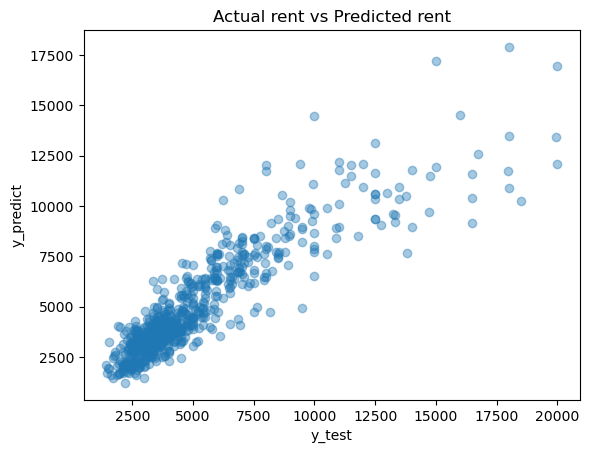

In [30]:
# create 2D scatter plot using y_test and y_predict
plt.scatter(y_test, y_predict, alpha = 0.4)
# add appropriate x-axis label and y-axis label and the title
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.title("Actual rent vs Predicted rent")
# show the plot
plt.show()

### Multiple Linear Regression Equation

Now that we have implemented Multiple Linear Regression, we will learn how to tune and evaluate the model. Before we do that, however, it’s essential to learn the equation behind it.

Equation 6.1 The equation for multiple linear regression that uses two independent variables is this:
$$\\y = b+m_{1}x_{1}+m_{2}x_{2}$$

Equation 6.2 The equation for multiple linear regression that uses three independent variables is this:
$$\\y = b+m_{1}x_{1}+m_{2}x_{2}+m_{3}x_{3}$$

Equation 6.3 As a result, since multiple linear regression can use any number of independent variables, its general equation becomes:
$$\\y = b+m_{1}x_{1}+m_{2}x_{2}+...+m_{n}x_{n}$$

Here, m1, m2, m3, … mn refer to the coefficients, and b refers to the intercept that you want to find. You can plug these values back into the equation to compute the predicted y values.

Remember, with sklearn‘s LinearRegression() method, we can get these values with ease.

The .fit() method gives the model two variables that are useful to us:

* .coef_, which contains the coefficients
* .intercept_, which contains the intercept
After performing multiple linear regression, you can print the coefficients using .coef_.

Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively.

In [31]:
# show the coefficients (slope)
print(mlr.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]
